In [1]:
"""
@author: pho

A fresh start using modern pipeline methods without all the excessive imports. Created by Pho on 2022-06-14

"""
# noinspection JupyterPackage
%load_ext autoreload
%autoreload 2
import sys
import importlib

from numba import jit
import numpy as np
import pandas as pd

# required to enable non-blocking interaction:
%gui qt5

import pyphoplacecellanalysis.External.pyqtgraph as pg
from pyphoplacecellanalysis.External.pyqtgraph.Qt import QtCore, QtGui, QtWidgets

# Pho's Formatting Preferences
from pyphocorehelpers.preferences_helpers import set_pho_preferences
set_pho_preferences()
np.set_printoptions(edgeitems=30, linewidth=100000, formatter=dict(float=lambda x: "%g" % x))

%config Completer.use_jedi = False

from pyphoplacecellanalysis.External.pyqtgraph.flowchart import Flowchart, Node
import pyphoplacecellanalysis.External.pyqtgraph.flowchart.library as fclib
from pyphoplacecellanalysis.GUI.PyQtPlot.Flowchart.ReloadableNodeLibrary import ReloadableNodeLibrary
from pyphoplacecellanalysis.GUI.Qt.MainApplicationWindows.PhoPipelineMainWindow.pyqtplot_MainWindow import PhoPipelineMainWindow
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.DockAreaWrapper import DockAreaWrapper, PhoDockAreaContainingWindow
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.Mixins.RenderTimeEpochs.TestBackgroundWorker import WorkerSignals, Worker

# Manual Flowchart creation without corresponding GUI

In [2]:
from collections import namedtuple
NodesTuple = namedtuple("NodesTuple", "input filter computation display")

def build_default_non_graphical_pipeline():
    """ Builds the pipeline backend for computations, for either programmatic or graphical use.
    
        flowchart, pipeline_nodes = _build_default_pipeline()
        input_node, filter_node, computation_node, display_node = pipeline_nodes
    """
    ## Create an empty flowchart with a single input and output
    flowchart = Flowchart(terminals={
        'dataIn': {'io': 'in'},
        'dataOut': {'io': 'out'}    
    })

    # # Add the flowchart widget. This is actually not the programmatic programming environment itself, it's the column that lists the nodes and lets you set their parameters.
    pipeline_start_x = 0
    flowchart.setInput(dataIn=None)

    # Setup the nodes in the flowchart:
    ReloadableNodeLibrary.setup_custom_node_library(flowchart)

    # Create the nodes:
    pipeline_input_node = flowchart.createNode('PipelineInputDataNode', pos=(pipeline_start_x-400, 50))
    pipeline_filter_node = flowchart.createNode('PipelineFilteringDataNode', pos=(pipeline_start_x-26, 50))
    pipeline_computation_node = flowchart.createNode('PipelineComputationsNode', pos=(pipeline_start_x+154, 50))
    pipeline_display_node = None
    # pipeline_nodes = {'input': pipeline_input_node, 'filter': pipeline_filter_node, 'computation': pipeline_computation_node, 'display': pipeline_display_node}
    pipeline_nodes = NodesTuple(pipeline_input_node, pipeline_filter_node, pipeline_computation_node,  pipeline_display_node)
    
    ## Wire them up:
    # Setup connections:
    flowchart.connectTerminals(flowchart['dataIn'], pipeline_input_node['known_mode'])
    # Input Node Outputs:
    flowchart.connectTerminals(pipeline_input_node['loaded_pipeline'], pipeline_filter_node['pipeline'])
    flowchart.connectTerminals(pipeline_input_node['known_data_mode'], pipeline_filter_node['active_data_mode'])
    # flowchart.connectTerminals(pipeline_input_node['known_data_mode'], pipeline_display_node['mode'])

    # Filter Node Outputs:
    flowchart.connectTerminals(pipeline_filter_node['filtered_pipeline'], pipeline_computation_node['pipeline'])
    flowchart.connectTerminals(pipeline_filter_node['computation_configs'], pipeline_computation_node['computation_configs'])
    # flowchart.connectTerminals(pipeline_filter_node['filter_configs'], pipeline_display_node['filter_configs'])

    # Computation Node Outputs:
    # flowchart.connectTerminals(pipeline_computation_node['computed_pipeline'], pipeline_display_node['pipeline'])
    # flowchart.connectTerminals(pipeline_computation_node['updated_computation_configs'], pipeline_display_node['computation_configs'])
    # flowchart.connectTerminals(pipeline_computation_node['computed_pipeline'], pipeline_result_viz_node['pipeline'])
    # flowchart.connectTerminals(pipeline_computation_node['updated_computation_configs'], pipeline_result_viz_node['computation_configs'])
    flowchart.connectTerminals(pipeline_computation_node['computed_pipeline'], flowchart['dataOut']) # raw pipeline output from computation node
    
    return flowchart, pipeline_nodes


flowchart, pipeline_nodes = build_default_non_graphical_pipeline()
pipeline_input_node, pipeline_filter_node, pipeline_computation_node, pipeline_display_node = pipeline_nodes


num_known_types: 3
ctrl_node_ops: [('data_mode', 'combo', {'values': ['custom...'], 'index': 0})]
 custom_ops:[('reload', 'action')]
 self.uiTemplate: [('data_mode', 'combo', {'values': ['custom...'], 'index': 0})]

ctrl_node_ops: []
 custom_ops:[('included_configs_table', 'extendedchecktable', {'columns': ['filter'], 'rows': []}), ('refilter', 'action')]
 self.uiTemplate: []

ctrl_node_ops: []
 custom_ops:[('included_configs_table', 'extendedchecktable', {'columns': ['compute'], 'rows': []}), ('recompute', 'action')]
 self.uiTemplate: []



In [4]:
## Successfully initiate the pipeline with the input, and have it run as far as it can until encounter an exception:
out_data = flowchart.process(dataIn='kdiba')
# Get the pipeline of the most advanced completed stage:
completed_nodes = [a_node for a_node in pipeline_nodes if a_node is not None and a_node.exception is None] # only return nodes that don't have exceptions
if len(completed_nodes) > 0:
    most_advanced_completed_stage_node = completed_nodes[-1]
    print(f'most_advanced_completed_stage_node: {most_advanced_completed_stage_node}')
else:
    most_advanced_completed_stage_node = None
    print(f'no nodes completed!')
# pipeline_input_node.exception
# pipeline_computation_node.exception
curr_active_pipeline = out_data.get('dataOut', None)
curr_active_pipeline

PipelineInputDataNode data_mode from dropdown list: kdiba
PipelineInputDataNode.process(known_mode: kdiba, display: False)...
basedir is already Path object.
Loading matlab import file results to R:\data\KDIBA\gor01\one\2006-6-07_11-26-53\2006-6-07_11-26-53.epochs_info.mat... done.
Loading matlab import file results to R:\data\KDIBA\gor01\one\2006-6-07_11-26-53\2006-6-07_11-26-53.position_info.mat... done.
Loading matlab import file results to R:\data\KDIBA\gor01\one\2006-6-07_11-26-53\2006-6-07_11-26-53.spikes.mat... 

c:\users\pho\repos\neuropy\neuropy\core\session\Formats\SessionSpecifications.py:139: UserWarning: WARNING: Optional File: R:\data\KDIBA\gor01\one\2006-6-07_11-26-53\2006-6-07_11-26-53.dat does not exist. Continuing without it.
  warnings.warn(f'WARNING: Optional File: {an_optional_filepath} does not exist. Continuing without it.')


done.
Failure loading .position.npy. Must recompute.

Computing linear positions for all active epochs for session... Saving updated position results results to R:\data\KDIBA\gor01\one\2006-6-07_11-26-53\2006-6-07_11-26-53.position.npy... 2006-6-07_11-26-53.position.npy saved
done.
	 Failure loading .interpolated_spike_positions.npy. Must recompute.

Computing interpolate_spike_positions columns results to spikes_df... done.
	 Saving updated interpolated spike position results results to R:\data\KDIBA\gor01\one\2006-6-07_11-26-53\2006-6-07_11-26-53.interpolated_spike_positions.npy... 2006-6-07_11-26-53.interpolated_spike_positions.npy saved
done.
Loading matlab import file results to R:\data\KDIBA\gor01\one\2006-6-07_11-26-53\2006-6-07_11-26-53.laps_info.mat... done.
setting laps object.
session.laps loaded successfully!
Loading success: .ripple.npy.
Loading success: .mua.npy.
Loading success: .pbe.npy.
Computing spikes_df PBEs column results to spikes_df... done.
Computing added spike

In [ ]:
# pipeline_filter_node.enabled_filters # []
# pipeline_filter_node.configRows # ['maze1', 'maze2', 'maze']
# pipeline_filter_node.selectFirstConfigRow()

pipeline_input_node.outputValues()
# pipeline_filter_node.outputValues()
# most_advanced_completed_stage_node.outputValues()

In [ ]:
most_advanced_completed_stage_node.try_check_at_least_one_check_table_row()

#### Note: can do programmatic updates on the nodes via:
```python
## get the Node's control widget and place it inside the main window
filterCtrl = filterNode.ctrlWidget()
someLayout.addWidget(filterCtrl)

## later on, process data through the node
filteredData = filterNode.process(inputTerminal=rawData)

```

In [ ]:
## Where is the result from .process(...) going?

## later on, process data through the node
# filteredData = filterNode.process(inputTerminal=rawData)

In [ ]:
pipeline_computation_node.outputs()['computed_pipeline'].value()

### Try to extract the results into the Jupyter-lab notebook from the Flowchart nodes:

In [ ]:
# Note this works, meaning I can get the values just like I do in the regular Jupyter-Lab notebook
curr_active_pipeline = pipeline_computation_node.outputs()['computed_pipeline'].value()
# curr_active_pipeline # NeuropyPipeline
curr_active_pipeline

In [ ]:
active_config_name = 'maze1'
# active_config_name = 'maze'

# Get relevant variables:
# curr_active_pipeline is set above, and usable here
sess = curr_active_pipeline.filtered_sessions[active_config_name]
active_computed_data = curr_active_pipeline.computation_results[active_config_name].computed_data
print(f'active_computed_data.keys(): {active_computed_data.keys()}')

# Graphical Flowchart Pipeline

In [ ]:
class GraphicalFlowchartPipeline:

    def build_flowchart_gui(self, flowchart, pipeline_nodes):
        # Extract the individual nodes and their control widgets:
        pipeline_input_node, pipeline_filter_node, pipeline_computation_node, pipeline_display_node = pipeline_nodes
        
        # build a win of type PhoDockAreaContainingWindow
        win, app = DockAreaWrapper._build_default_dockAreaWindow(title='ModernNeuroPyNotebook', defer_show=False)

        ## Build Controls to set node parameters:
        # inputCtrl = pipeline_input_node.ctrlWidget()
        # filterCtrl = pipeline_filter_node.ctrlWidget()
        # computationCtrl = pipeline_computation_node.ctrlWidget()

        # Add the controls to a layout:
        layout_widget = pg.LayoutWidget()
        layout_widget.setWindowTitle('Manu Flowchar Widget Display')

        # (inputCtrl, filterCtrl, computationCtrl)
        # layout_widget.addWidget(inputCtrl, row=0, col=0)
        # layout_widget.addWidget(filterCtrl, row=1, col=0)
        # layout_widget.addWidget(computationCtrl, row=2, col=0)

        ## Build Controls to set node parameters:
        for i, a_pipeline_node in enumerate(pipeline_nodes):
            if a_pipeline_node is not None:
                currCtrl = a_pipeline_node.ctrlWidget()
                layout_widget.addWidget(currCtrl, row=i, col=0)
            
        layout_widget.resize(800,900)

        _, dDisplayItem1 = win.add_display_dock("Node Controls", dockSize=(800, 900), dockIsClosable=False, widget=layout_widget, dockAddLocationOpts=['left'])
        
        flowchart_controls_widget = flowchart.widget() # FlowchartCtrlWidget
        flowchart_window = flowchart_controls_widget.cwWin
        _, dDisplayItem2 = win.add_display_dock("Flowchart", dockSize=(1600, 900), dockIsClosable=False, widget=flowchart_window, dockAddLocationOpts=['right'])
        
        return layout_widget, win, app
    
    
gui_pipeline = GraphicalFlowchartPipeline()
layout_widget, win, app = gui_pipeline.build_flowchart_gui(flowchart, pipeline_nodes)

## Testing burst detection: adding 3D curves for bursts

In [ ]:
from pybursts import pybursts
import matplotlib.pyplot as plt
from indexed import IndexedOrderedDict
from pyphocorehelpers.print_helpers import print_dataframe_memory_usage

active_burst_info = active_computed_data['burst_detection']
active_burst_intervals = active_burst_info['burst_intervals']

In [ ]:
active_burst_intervals.values()[0]

## Test Adding Dynamic Menus and Status bars:

In [ ]:
# ipspikesDataExplorer.p.app_window # <pyvistaqt.window.a_main_window at 0x16148c1e160>
curr_window = ipspikesDataExplorer.p.app_window
menubar = curr_window.menuBar()
# root_children = menubar.children()
root_children = [a_child for a_child in menubar.children() if isinstance(a_child, pg.QtWidgets.QMenu)] # .title
root_children
# QMenu
# fileMenu = menubar.addMenu('&File')
# [a_child.objectName() for a_child in menubar.children()] # .title

[a_child.title() for a_child in root_children] # .title ['File', 'View', 'Tools', '', '&File']
# QToolButton

In [ ]:
from pyphoplacecellanalysis.GUI.Qt.Mixins.Menus.ConnectionControlsMenuMixin import ConnectionControlsMenuMixin
curr_window, menuConnections, actions_dict = ConnectionControlsMenuMixin.try_add_connections_menu(win)

In [ ]:
from pyphoplacecellanalysis.GUI.Qt.Mixins.Menus.CreateNewConnectedWidgetMenuMixin import CreateNewConnectedWidgetMenuMixin
curr_window, menuCreateNewConnected, actions_dict = CreateNewConnectedWidgetMenuMixin.try_add_create_new_connected_widget_menu(a_content_widget=win)

In [ ]:
## Actions to be executed to create new plotters:

# TODO: see if we need to do something like
# global_connected_widgets = {}

def _test_create_new_pyqtgraph_plotter():
    """ Implicitly captures spike_raster_window """
    test_independent_pyqtgraph_raster_widget = spike_raster_window.create_new_connected_widget(type_of_3d_plotter='pyqtgraph')
    test_independent_pyqtgraph_raster_widget.show()
    
def _test_create_new_vedo_plotter():
    """ Implicitly captures spike_raster_window """
    test_independent_vedo_raster_widget = spike_raster_window.create_new_connected_widget(type_of_3d_plotter='vedo')
    test_independent_vedo_raster_widget.show()
    # global_connected_widgets['test_independent_vedo_raster_widget'] = test_independent_vedo_raster_widget
    
## These DataExplorers can't be created from spike_raster_window alone because it only holds a spike_df and not a full session object. Thus need to capture:
""" 
curr_active_pipeline, active_config_name, DefaultDisplayFunctions, display_output, and spike_raster_window

"""
def _test_create_new_DataExplorer_ipc_plotter():
    """ Implicitly captures spike_raster_window """
    pActiveTuningCurvesPlotter = None
    display_output = {}
    display_output = display_output | curr_active_pipeline.display(DefaultDisplayFunctions._display_3d_interactive_tuning_curves_plotter, active_config_name, extant_plotter=display_output.get('pActiveTuningCurvesPlotter', None), panel_controls_mode='Qt') # Works now!
    ipcDataExplorer = display_output['ipcDataExplorer']
    display_output['pActiveTuningCurvesPlotter'] = display_output.pop('plotter') # rename the key from the generic "plotter" to "pActiveSpikesBehaviorPlotter" to avoid collisions with others
    pActiveTuningCurvesPlotter = display_output['pActiveTuningCurvesPlotter']
    root_dockAreaWindow, placefieldControlsContainerWidget, pf_widgets = display_output['pane'] # for Qt mode:
    
def _test_create_new_DataExplorer_ipspikes_plotter():
    """ Implicitly captures spike_raster_window """
    pActiveSpikesBehaviorPlotter = None
    display_output = {}
    display_output = display_output | curr_active_pipeline.display(DefaultDisplayFunctions._display_3d_interactive_spike_and_behavior_browser, active_config_name, extant_plotter=display_output.get('pActiveSpikesBehaviorPlotter', None)) # Works now!
    ipspikesDataExplorer = display_output['ipspikesDataExplorer']
    display_output['pActiveSpikesBehaviorPlotter'] = display_output.pop('plotter') # rename the key from the generic "plotter" to "pActiveSpikesBehaviorPlotter" to avoid collisions with others
    pActiveSpikesBehaviorPlotter = display_output['pActiveSpikesBehaviorPlotter']
    ## Sync ipspikesDataExplorer to raster window:
    extra_interactive_spike_behavior_browser_sync_connection = spike_raster_window.connect_additional_controlled_plotter(controlled_plt=ipspikesDataExplorer)
    # test_independent_vedo_raster_widget.show()


curr_window.ui.createNewConnectedWidgetMenuActionsDict['actionNewConnected3DRaster_PyQtGraph'].triggered.connect(_test_create_new_pyqtgraph_plotter)
curr_window.ui.createNewConnectedWidgetMenuActionsDict['actionNewConnected3DRaster_Vedo'].triggered.connect(_test_create_new_vedo_plotter)
curr_window.ui.createNewConnectedWidgetMenuActionsDict['actionNewConnectedDataExplorer_ipc'].triggered.connect(_test_create_new_DataExplorer_ipc_plotter)
curr_window.ui.createNewConnectedWidgetMenuActionsDict['actionNewConnectedDataExplorer_ipspikes'].triggered.connect(_test_create_new_DataExplorer_ipspikes_plotter)


# curr_window

In [ ]:
CreateNewConnectedWidgetMenuMixin.try_remove_create_new_connected_widget_menu(a_content_widget=win)

# Custom Export Widget Testing

In [ ]:
# List available properties from the dictionary:
enable_debug_print = True

curr_epoch_labels = list(curr_active_pipeline.sess.epochs.labels) # ['pre', 'maze1', 'post1', 'maze2', 'post2']
if enable_debug_print:
    print(f'curr_epoch_labels: {curr_epoch_labels}')
    
curr_named_timeranges = [curr_active_pipeline.sess.epochs.get_named_timerange(a_label) for a_label in curr_epoch_labels]
if enable_debug_print:
    print(f'curr_named_timeranges: {curr_named_timeranges}')

# Filters list:
all_filters_list = list(curr_active_pipeline.filtered_sessions.keys())
if enable_debug_print:
    print(f'all_filters_list: {all_filters_list}')

    
all_computed_timeranges_list = _get_valid_computation_results_config_names(curr_active_pipeline)
if enable_debug_print:
    print(f'all_computed_timeranges_list: {all_computed_timeranges_list}')
    
"""
    curr_epoch_labels: ['maze1', 'maze2']
    curr_named_timeranges: [<NamedTimerange: {'name': 'maze1', 'start_end_times': array([22.26, 1739.15])};>, <NamedTimerange: {'name': 'maze2', 'start_end_times': array([1739.15, 1932.42])};>]
    all_filters_list: ['maze1']
    computed_config_names_list: ['maze1']
    all_computed_timeranges_list: ['maze1']
"""

# active_config_name = 'maze1'

## Path selection via Custom Save Widget Testing

In [ ]:
from pyphocorehelpers.gui.Qt.InlineFilesystemPathSelectWidget.InlineFilesystemPathSelectWidget import InlineFilesystemPathSelectWidget
from pyphocorehelpers.gui.PhoUIContainer import PhoUIContainer


# Build a CtrlWidget for exporting the results out to file:
export_ui = PhoUIContainer('ExportNode')
export_ui.layout_widget = pg.LayoutWidget()
export_ui.layout_widget.setWindowTitle('ExportNode CtrlWidget')

# Build the export path selection widget
export_ui.path_data_root_select_widget = InlineFilesystemPathSelectWidget('Export')
export_ui.layout_widget.addWidget(export_ui.path_data_root_select_widget, colspan=2)
export_ui.layout_widget.nextRow()
export_ui.btnExport = pg.FeedbackButton('Export')
export_ui.layout_widget.addWidget(export_ui.btnExport, colspan=1, col=1)

export_ui.layout_widget.show()
# export_ui.root_widget.setLayout(export_ui.layout_widget)
# export_ui.root_widget.show()
# export_ui.path_data_root_select_widget.show()

## pg.ParameterList version:

In [ ]:
# import pyphoplacecellanalysis.External.pyqtgraph.parametertree.parameterTypes as pTypes
# from pyphoplacecellanalysis.External.pyqtgraph.parametertree import Parameter, ParameterTree
from pyphoplacecellanalysis.GUI.PyQtPlot.Params.ParameterTrees.ExportPipelineParametersTree import build_export_parameters_tree

p = build_export_parameters_tree(curr_active_pipeline, parameter_names='ExportParams', finalized_output_cache_file='data/pipeline_cache_store.h5', include_state_save_restore_buttons=False, debug_print=True)

In [ ]:
from pyphoplacecellanalysis.External.pyqtgraph.parametertree import Parameter, ParameterTree
## Create ParameterTree widget
t = ParameterTree()
t.setParameters(p, showTop=False)
t.setWindowTitle('Export Parameters Tree Example')
t.resize(700, 1000)
t.show()

In [ ]:
included_exports_checklist = p.param('Included Exports')
included_exports_checklist

In [ ]:
p['Included Exports']

In [ ]:
included_exports_checklist

In [ ]:
export_keys_list = p.param("Export Keys")
export_keys_list # ExportHdf5KeysGroup 

In [ ]:
export_keys_list.clearChildren()
# export_keys_list.addChildren(children=)

In [ ]:
# export_keys_list.children = 

In [ ]:
p["Export Keys"].children()

In [ ]:
export_keys_list = p.param("Export Keys") # ExportHdf5KeysGroup 
[str(a_child.name()) for a_child in export_keys_list.children()] # ['/filtered_sessions/maze1/spikes_df', '/filtered_sessions/maze1/pos_df']


In [ ]:
## test save/restore
state = p.saveState()
p.restoreState(state)
compareState = p.saveState()
print(f'state: {state}')
assert pg.eq(compareState, state)

In [ ]:
from pyphocorehelpers.print_helpers import print_keys_if_possible, print_value_overview_only

print_keys_if_possible('state', state)

# Reference

## Widget Reference

### Qt QFormLayout example

In [ ]:
win = QtWidgets.QWidget()

l1 = QtWidgets.QLabel("Name")
nm = QtWidgets.QLineEdit()

l2 = QtWidgets.QLabel("Address")
add1 = QtWidgets.QLineEdit()
add2 = QtWidgets.QLineEdit()
fbox = QtWidgets.QFormLayout()
fbox.addRow(l1,nm)
vbox = QtWidgets.QVBoxLayout()

vbox.addWidget(add1)
vbox.addWidget(add2)
fbox.addRow(l2,vbox)
hbox = QtWidgets.QHBoxLayout()

r1 = QtWidgets.QRadioButton("Male")
r2 = QtWidgets.QRadioButton("Female")
hbox.addWidget(r1)
hbox.addWidget(r2)
hbox.addStretch()
fbox.addRow(QtWidgets.QLabel("sex"), hbox)
fbox.addRow(QtWidgets.QPushButton("Submit"), QtWidgets.QPushButton("Cancel"))

win.setLayout(fbox)

win.setWindowTitle("PyQt")
win.show()

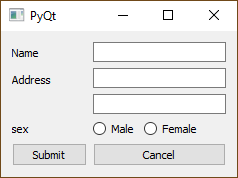